In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('..//data//train.csv')

In [3]:
data.columns


Index(['text', 'label'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
data.shape

(16000, 2)

<Axes: xlabel='label', ylabel='count'>

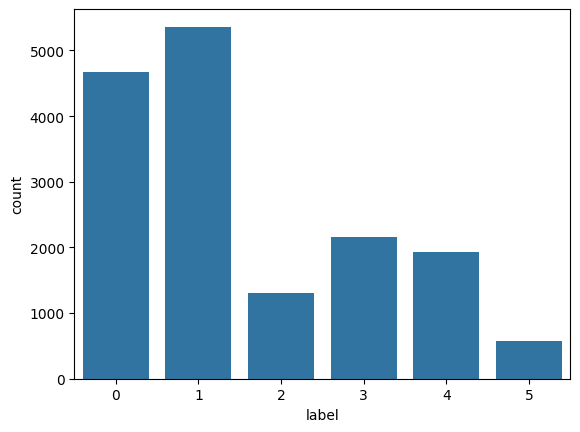

In [7]:
#visualize the data

sns.countplot(x="label",data=data)

In [8]:
emotion_labels = {
    'sadness': 0,
    'happy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'surprise': 5
}

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

In [11]:
stop_words = stopwords.words('english') 

In [12]:
# stop_words

In [13]:
lem = WordNetLemmatizer()

In [14]:
# text_processing 

def fun_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    text = ' '.join([lem.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

fun_text('I am satyam kumar from aurangabad bihar 2bda65afbua')

'satyam kumar aurangabad bihar bdaafbua'

In [15]:

# data['cleaned_text'] = dat['text'].apply(text(fun_text())

data['cleaned_text'] = [fun_text(text) for text in data['text']]

In [16]:
data.head()

,text,label,cleaned_text
0,i didnt feel humiliated,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,feeling grouchy


In [17]:
#data spliting

X = data['cleaned_text']
Y = data['label']

In [18]:
X

0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic still waiting table subb...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: cleaned_text, Length: 16000, dtype: object

In [19]:
Y

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [22]:
X.shape,X_train.shape,X_test.shape,   Y.shape,Y_train.shape,Y_test.shape



((16000,), (12800,), (3200,), (16000,), (12800,), (3200,))

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [24]:
#text vectorization

vectorizer = TfidfVectorizer(max_features = 5000)

In [25]:
X_train_vect  = vectorizer.fit_transform(X_train).toarray()

In [26]:
X_test_vect  = vectorizer.transform(X_test).toarray()

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train_vect,Y_train)

LogisticRegression()

In [29]:
Y_pred = model.predict(X_test_vect)

In [30]:
accuracy_score(Y_test,Y_pred)

0.8725

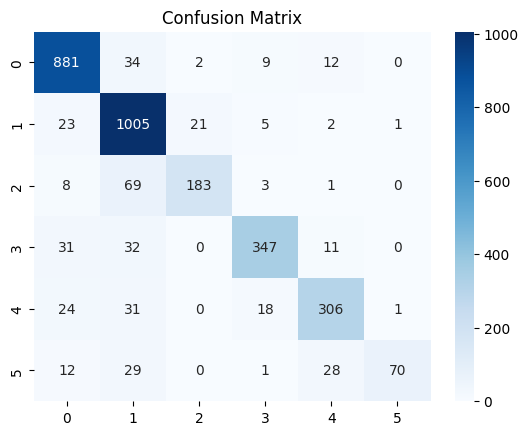

In [31]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#i got the error its only due to insufficient data 
#because here the accuracy for 2 and 4 is bad 


<Axes: xlabel='label', ylabel='count'>

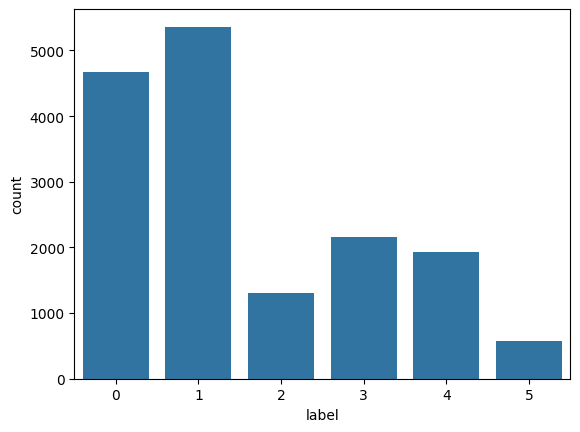

In [33]:
#visualize the data

sns.countplot(x="label",data=data)

In [35]:
import pickle

In [36]:
with open('..//saved_model//model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [37]:
with open('..//saved_model//vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)